# Case Study from Youtube https://www.youtube.com/watch?v=xArNPFG_nq0&list=WL&index=28&t=185s

In [563]:
import pandas as pd;
import matplotlib.pyplot as plt;
import matplotlib as mpl;
import numpy as np;

In [149]:
df = pd.read_csv('./data/singapore-residents data.csv')
df[df['year'] == 1960]

,year,level_1,value
0,1960,Total Residents,1646400
1,1960,Total Male Residents,859600
2,1960,Total Female Residents,786800
3,1960,Total Malays,232200
4,1960,Total Male Malays,121000
5,1960,Total Female Malays,111200
6,1960,Total Chinese,1251600
7,1960,Total Male Chinese,636000
8,1960,Total Female Chinese,615600
9,1960,Total Indians,133200


# Adjust DataSet

## Normalize data by removing calculated columns

In [150]:
idx = df[df['level_1'].str.contains('Residents') | df['level_1'].str.contains('Total Malays') | df['level_1'].str.contains('Total Chinese') | 
         df['level_1'].str.contains('Total Indians') | df['level_1'].str.contains('Other Ethnic Groups \(Total\)')].index
df.drop(idx, inplace= True)
df.head(10)

,year,level_1,value
4,1960,Total Male Malays,121000
5,1960,Total Female Malays,111200
7,1960,Total Male Chinese,636000
8,1960,Total Female Chinese,615600
10,1960,Total Male Indians,88000
11,1960,Total Female Indians,45200
13,1960,Other Ethnic Groups (Males),14600
14,1960,Other Ethnic Groups (Females),14800
19,1961,Total Male Malays,125700
20,1961,Total Female Malays,116800


## Turn rows into Columns using Pivot Table

In [632]:
pvt = df.pivot_table(index='year', columns='level_1', values='value')
pd.options.display.float_format = '{:,.0f}'.format  #None
pvt.head(2)

level_1,Other Ethnic Groups (Females),Other Ethnic Groups (Males),Total Female Chinese,Total Female Indians,Total Female Malays,Total Male Chinese,Total Male Indians,Total Male Malays
year,,,,,,,,
1960,"14,800","14,600","615,600","45,200","111,200","636,000","88,000","121,000"
1961,"14,800","14,400","637,400","46,900","116,800","657,600","88,800","125,700"


## Rearrange columns

In [633]:
pvt = pvt[['Total Male Malays', 'Total Female Malays', 'Total Male Chinese', 'Total Female Chinese', 'Total Male Indians',
           'Total Female Indians', 'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)']]
pvt.head(2)

level_1,Total Male Malays,Total Female Malays,Total Male Chinese,Total Female Chinese,Total Male Indians,Total Female Indians,Other Ethnic Groups (Males),Other Ethnic Groups (Females)
year,,,,,,,,
1960,"121,000","111,200","636,000","615,600","88,000","45,200","14,600","14,800"
1961,"125,700","116,800","657,600","637,400","88,800","46,900","14,400","14,800"


# At What rate singapore populaton is increasing?

In [214]:
# Get the sum for each row, then find the percentage change:
#df.iloc[0,:].sum()
pct = pvt.sum(axis=1).pct_change(periods=1) * 100
np.mean(pct)
# Population increases by 1.5% yearly

1.546640596112704

# Which Ethinic group has the highest representation in Singapore?

In [634]:
# Sum each group then get their max
sums = pvt.sum(axis=0)
sums = sums.to_frame().reset_index()
sums

,level_1,0
0,Total Male Malays,"11,702,782"
1,Total Female Malays,"11,446,983"
2,Total Male Chinese,"62,671,373"
3,Total Female Chinese,"63,112,372"
4,Total Male Indians,"6,970,639"
5,Total Female Indians,"5,866,098"
6,Other Ethnic Groups (Males),"1,558,752"
7,Other Ethnic Groups (Females),"1,668,893"


In [635]:
sums.groupby(sums.index // 2).sum().sort_values(by=0)
# Chinese are the largest ethnic group

,level_1,0
3,Other Ethnic Groups (Males)Other Ethnic Groups...,"3,227,645"
2,Total Male IndiansTotal Female Indians,"12,836,737"
0,Total Male MalaysTotal Female Malays,"23,149,765"
1,Total Male ChineseTotal Female Chinese,"125,783,745"


# In last 10 years which ethnic group showed the highest increment?

In [636]:
# Get the last 10 years sums
pvt.sort_index().tail(10).sum().sort_values()

# Chinese show the highest increment in last 10 years

level_1
Other Ethnic Groups (Males)        595,798
Other Ethnic Groups (Females)      665,241
Total Female Indians             1,711,801
Total Male Indians               1,815,753
Total Male Malays                2,569,087
Total Female Malays              2,593,827
Total Male Chinese              14,012,894
Total Female Chinese            14,660,470
dtype: float64

# In which years female populations were higher than male

In [646]:
# sum all male and female, then show the years where female were higher
#female_male_sums = 
males = pvt[pvt.columns[pvt.columns.str.contains('Male')]].sum(axis=1)
males.rename('Males', inplace=True).head(2)

year
1960   859,600
1961   886,500
Name: Males, dtype: float64

In [647]:
females = pvt[pvt.columns[pvt.columns.str.contains('Female')]].sum(axis=1)
females.rename('Females', inplace=True).head(2)

year
1960   786,800
1961   815,900
Name: Females, dtype: float64

In [648]:
f_m_totals = pd.merge(males, females, right_on=males.index, left_on=females.index) #  pd.concat([males, females], axis=1)
f_m_totals.head(2)

,key_0,Males,Females
0,1960,"859,600","786,800"
1,1961,"886,500","815,900"


In [649]:
filtered = f_m_totals[f_m_totals['Females'] > f_m_totals['Males']]
filtered['key_0'].reset_index()

# Females incremented more than Males for 20 years from 1999 to 2018

,index,key_0
0,39,1999
1,40,2000
2,41,2001
3,42,2002
4,43,2003
5,44,2004
6,45,2005
7,46,2006
8,47,2007
9,48,2008


# What is the trend of the past 10 years in male and female population?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2010'),
  Text(2, 0, '2011'),
  Text(3, 0, '2012'),
  Text(4, 0, '2013'),
  Text(5, 0, '2014'),
  Text(6, 0, '2015'),
  Text(7, 0, '2016'),
  Text(8, 0, '2017'),
  Text(9, 0, '2018')])

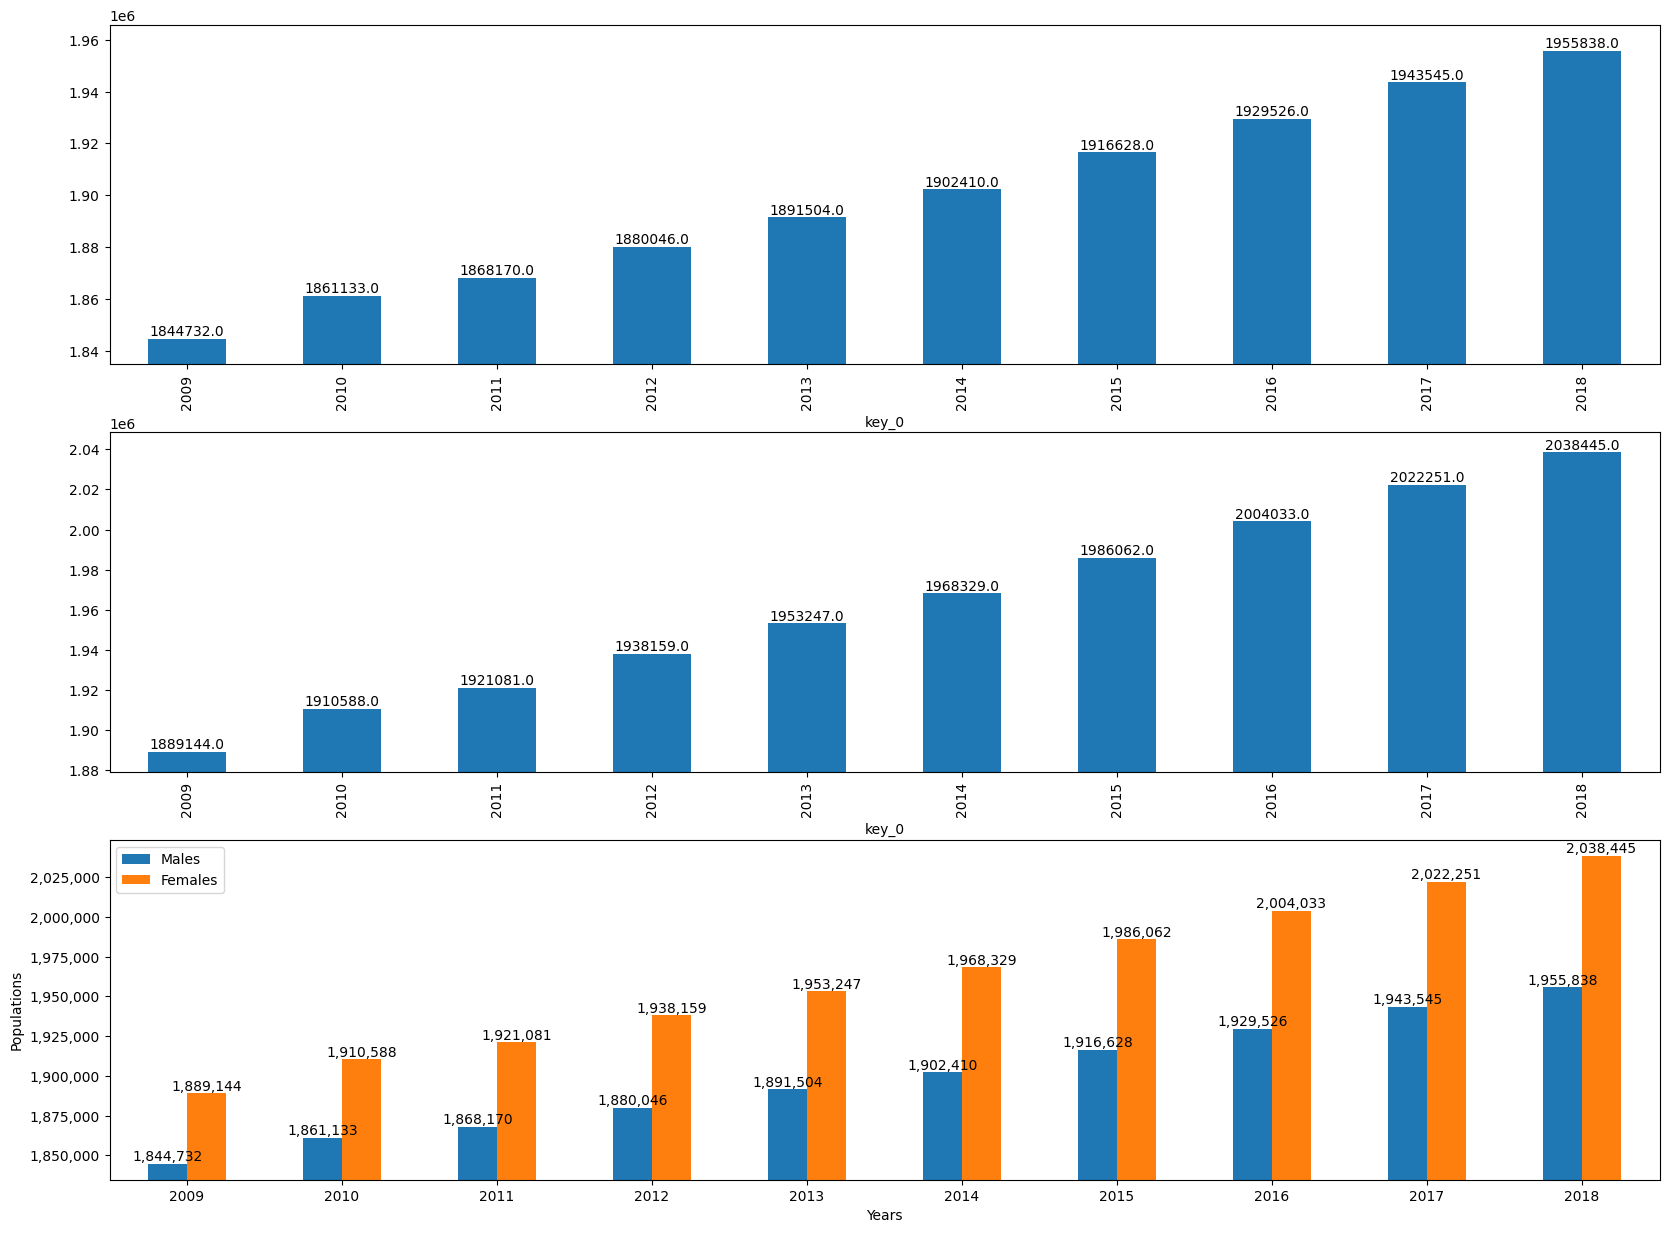

In [650]:
males = f_m_totals['Males'].tail(10)
males.index = f_m_totals['key_0'].tail(10)

females = f_m_totals['Females'].tail(10)
females.index = males.index


fig, ax = plt.subplots(3, figsize=(20,15))

ax[0].set_ylim(males.min() - 10000, males.max() + 10000)
males.plot.bar(ax=ax[0])

for rect, label in zip(ax[0].patches, males):
    height = rect.get_height()
    ax[0].text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

ax[1].set_ylim(females.min() - 10000, females.max() + 10000)
#ax[1].bar_label(ax[1].containers[0], label_type= 'edge', lables=females)
females.plot.bar(ax=ax[1])


for rect, label in zip(ax[1].patches, f_m_totals['Females'].tail(10)):
    height = rect.get_height()
    ax[1].text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )


fmt = lambda x : '{:,.0f}'.format(x)

p = f_m_totals.tail(10).set_index('key_0').plot.bar(ax = ax[2])
p.set_ylim(males.min() - 10000, females.max() + 10000)
p.bar_label(p.containers[0], labels=males.apply(func= fmt))
p.bar_label(p.containers[1], labels= females.apply(func = fmt))
p.set_xlabel('Years')
p.set_ylabel('Populations')
p.ticklabel_format(style='plain', useOffset=False, axis='y')
p.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=360)

# The trend is linear for both male and female during the last 10 years, having the female populations more than the male in all years

# What is the trend of China and India population in overall population?

array([<Axes: ylabel='0'>], dtype=object)

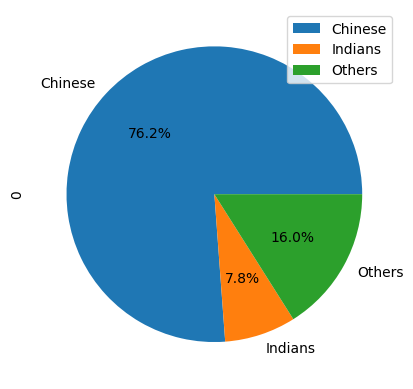

In [605]:
sums = pvt.sum()
malays = sums.loc['Total Male Malays'] + sums.loc['Total Female Malays']
chinese = sums.loc['Total Male Chinese'] + sums.loc['Total Male Chinese']
indians = sums.loc['Total Male Indians'] + sums.loc['Total Female Indians']
others = sums.loc['Other Ethnic Groups (Males)'] + sums.loc['Other Ethnic Groups (Females)']
sums_df = pd.DataFrame([chinese, indians, others + malays], index=['Chinese', 'Indians', 'Others'])
sums_df.plot.pie(subplots=True, autopct='%1.1f%%')


<Axes: xlabel='year'>

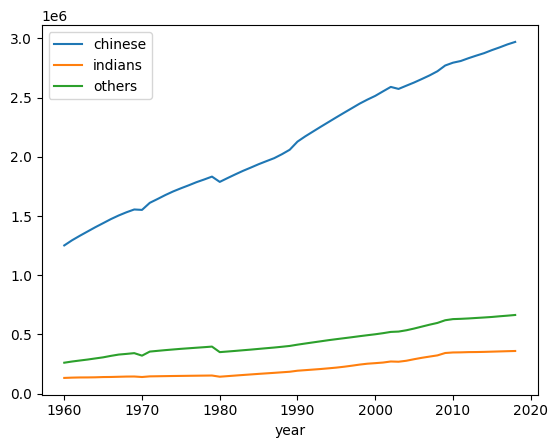

In [676]:
totals_df = pd.DataFrame({'chinese' : pvt[['Total Male Chinese', 'Total Female Chinese']].sum(axis=1), 
      'indians': pvt[['Total Male Indians', 'Total Female Indians']].sum(axis=1), 
      'others': pvt[['Total Male Malays', 'Total Female Malays', 'Other Ethnic Groups (Females)', 'Other Ethnic Groups (Males)']].sum(axis=1)})

totals_df.plot.line()

# All trends are linear but the steep for chinese is higher reflecting a high increase of chinese population each year